In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
bikes = pd.read_csv('/Users/jiawenli/Desktop/MBAN_6110T/Class_6/bikes_sharing.csv')

In [3]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


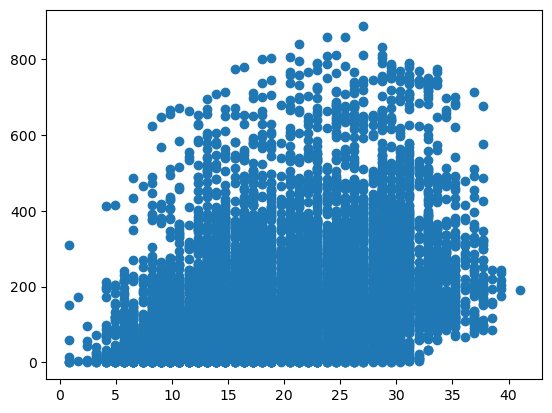

In [4]:
plt.scatter(bikes['temp'],bikes['registered'])

In [5]:
x = bikes['temp']
y = bikes['casual']

In [6]:
# ordinary least-square (ols)
results = ols('casual ~ temp', data=bikes).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     3037.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:41:25   Log-Likelihood:                -56684.
No. Observations:               10886   AIC:                         1.134e+05
Df Residuals:                   10884   BIC:                         1.134e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.5710      1.178    -20.855      0.0

R-square of 0.218 indicates that temperature describes 20% of the casual rent variability.

F-statistics tells about whether our model is statistically significant. If it's lower than 0.05, then that's good.

we want a low p value which indicates that our model shows a significant difference. In our case, p-value of 0 shows that our model is statiscally significant, which is good.

Try the model: y_hat = 53.1426 + 2.9255temp - 0.8365humidity - 36.0416workingday

In [7]:
53.1426 + 2.9255*9.84- 0.8365*81 - 36.0416*0

14.173019999999994

In [8]:
results_1 = ols('casual ~ temp + humidity + workingday', data=bikes).fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     2766.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:41:25   Log-Likelihood:                -54939.
No. Observations:               10886   AIC:                         1.099e+05
Df Residuals:                   10882   BIC:                         1.099e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.1426      1.663     31.961      0.0

In [9]:
pred_vals = results_1.predict(bikes[['temp','humidity','workingday']])

In [10]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),bikes['casual']],axis=1)

In [11]:
res['error'] = res['y_hat'] - res['casual']

In [12]:
res.head(1)

,y_hat,casual,error
0,14.175362,3,11.175362


In [13]:
res['sq_error'] = res['error']**2

In [14]:
np.sqrt(res['sq_error'].mean())

37.630976661566194

In [15]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


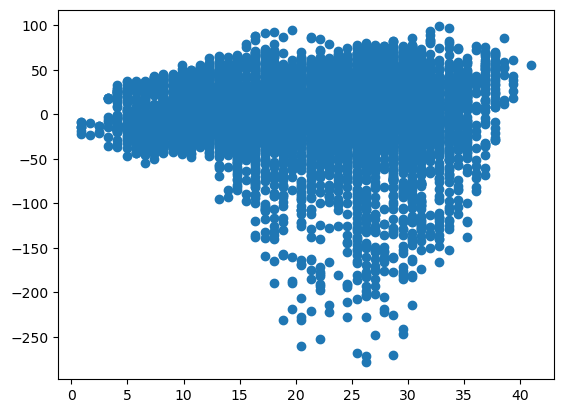

In [16]:
plt.scatter(bikes['temp'],res['error'])

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([-278.91580946, -271.42522287, -270.06496056, ...,   94.67880447,
           97.00144858,   98.7472395 ])),
 (35.25481020993883, 7.805275588370355e-14, 0.9365456663477384))

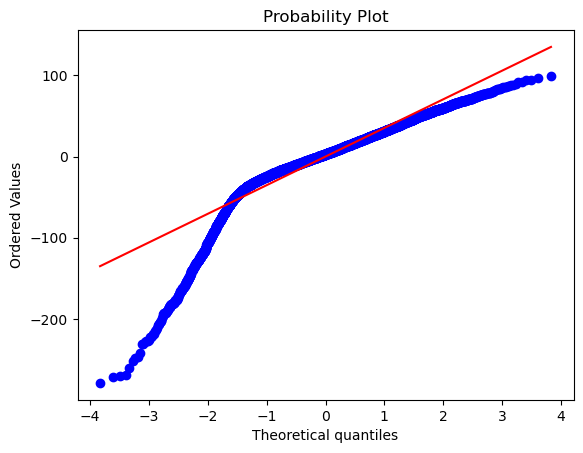

In [17]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'],dist='norm',plot=ax)

In [18]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_temp       cooks_d  standard_resid  hat_diag  \
0          -0.000661  0.000550  2.363299e-07       -0.043027  0.000255   
1           0.002052 -0.001735  2.231417e-06        0.125770  0.000282   
2           0.000944 -0.000798  4.721379e-07        0.057852  0.000282   
3          -0.000661  0.000550  2.363299e-07       -0.043027  0.000255   
4          -0.001706  0.001418  1.571260e-06       -0.110943  0.000255   
...              ...       ...           ...             ...       ...   
10881      -0.003001  0.001955  7.272532e-06       -0.341650  0.000125   
10882      -0.002121  0.001468  3.263776e-06       -0.218143  0.000137   
10883      -0.003183  0.002309  6.755888e-06       -0.298374  0.000152   
10884      -0.001251  0.000908  1.043633e-06       -0.117272  0.000152   
10885      -0.002818  0.002124  4.963071e-06       -0.242778  0.000168   

       dffits_internal  student_resid    dffits  
0            -0.000688      -0.043025 -0.000687  
1          

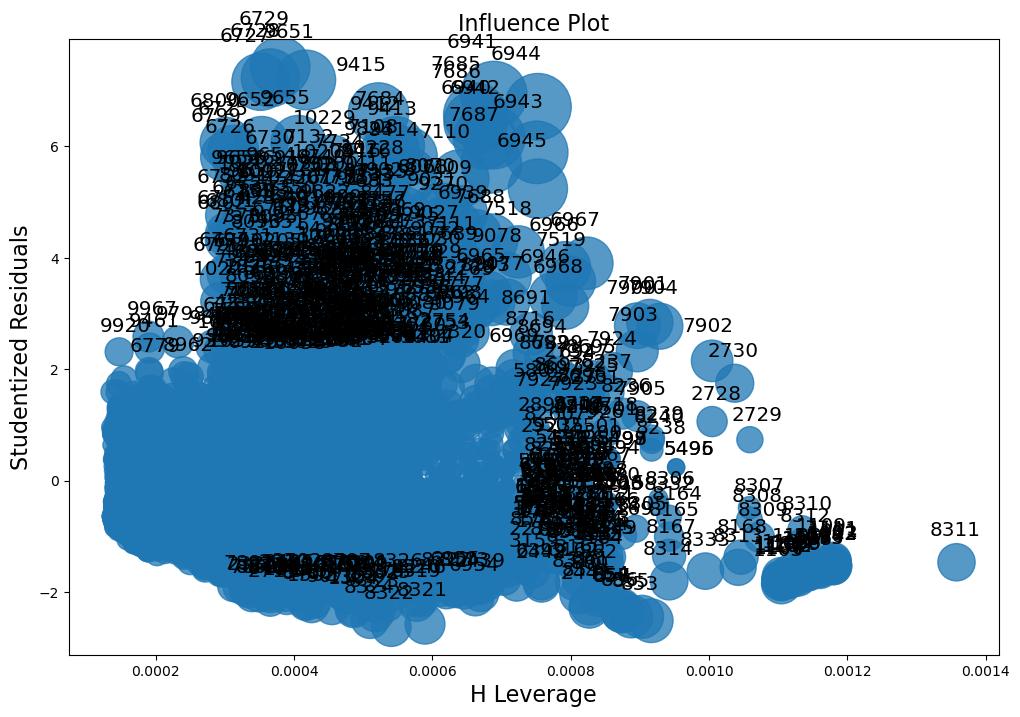

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results_1,ax=ax,criterion='DFFITS')

In [20]:
dummies_season = pd.get_dummies(bikes.season, dtype=int)

In [21]:
dummies_season.rename(columns={1:'win',2:'spr', 3:'sum', 4:'fall'}, inplace=True)

In [22]:
bikes = pd.concat([bikes, dummies_season], axis=1)

In [23]:
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,win,spr,sum,fall
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,0,0,0,1
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,0,0,0,1
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,0,0,0,1
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,0,0,0,1


In [24]:
bikes['datetime'] = pd.to_datetime(bikes['datetime'])